In [9]:
!pip install openai
!pip install langchain
!pip install tiktoken
!pip install spacy_llm
!pip install numpy==1.26.4
!pip install pandas==1.5.3  # version 2 is not compatible with eval
!pip install trectools


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 20.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.3.3 requires numpy<2,>=1; python_version < "3.12", but you have numpy 2.0.2 which is incompatible.
tensorflow 2.16.1 requires numpy<2.0.0,>=1.23.5; python_version <= "3.11", but you have numpy 2.0.2 wh

In [1]:
path_resources = "/home/jovyan/work/icdllmeval/resources"
path_codiesp = f"{path_resources}/download/codiesp/final_dataset_v4_to_publish"
path_reeval = f"{path_resources}/reeval/"
path_test_x_gold = f"{path_reeval}/testXgold.tsv"



In [2]:
import sys
import os

src_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))
sys.path.append(src_path)
print(sys.path)

['/opt/conda/lib/python311.zip', '/opt/conda/lib/python3.11', '/opt/conda/lib/python3.11/lib-dynload', '', '/opt/conda/lib/python3.11/site-packages', '/home/jovyan/work/icdllmeval/src']


In [3]:
import pandas as pd


from icdlmmeval.codiesp.codiformat import CodiFormat

codiformat = CodiFormat(path_codiesp)

train_x = codiformat.get_df_x(split='train')
train_x.head()

FILE           TYPE     CODE  \
0  S0004-06142005000700014-1  PROCEDIMIENTO  bw03zzz   
1  S0004-06142005000700014-1  PROCEDIMIENTO  3e02329   
2  S0004-06142005000700014-1    DIAGNOSTICO    n44.8   
3  S0004-06142005000700014-1    DIAGNOSTICO  z20.818   
4  S0004-06142005000700014-1    DIAGNOSTICO    r60.9   

                           SUBSTRING              OFFSETS  
0                           Rx tórax            2163 2171  
1       Estreptomicina intramuscular  2787 2801;2810 2823  
2  teste derecho aumentado de tamaño            1343 1376  
3              exposición a Brucella              594 615  
4                             edemas            1250 1256

In [6]:
dev_x = codiformat.get_df_x(split='dev')
test_x = codiformat.get_df_x(split='test')

print(len(train_x), len(dev_x), len(test_x))
print(len(train_x) + len(dev_x) + len(test_x))

9181 4477 4777
18435


In [4]:
import os

# Prompt the user to input their OPENAIKEY
openai_key = input("Please enter your OPENAIKEY: ")

# Set the environment variable
os.environ['OPENAI_API_KEY'] = openai_key

print("OPENAI_API_KEY has been set.")


OPENAI_API_KEY has been set.


In [5]:
from openai import OpenAI

client = OpenAI()

response = client.chat.completions.create(
    messages=[{
        "role": "user",
        "content": "Say this is a test",
    }],
    model="gpt-4o-mini",
)

print(response._request_id)

APIConnectionError: Connection error.

## ICD MIMICK medical coders by lead term lookup takes effort!

In [9]:
from icdlmmeval.icd_lookup import IcdLookup

icd_lookup = IcdLookup()

read path_icd_10_cm_codes
72184
read path_icd_10_pcs_codes
77559
read codiesp_codes
read icd10cm_index
read icd10cm_neoplasm
read icd10pcs_index
lookup dictonaries loaded


In [10]:
print(icd_lookup.get_main_terms_list("r60.9"))


['Edema, edematous(infectious) (pitting) (toxic)', 'Fluid', 'Hydrops', 'Pitting', 'Retention', 'Swelling(of)']


In [11]:
%load_ext autoreload
%autoreload 2
icd_lookup.get_cm_main_terms_entry("Edema")



[<mainTerm>
 <title>Edema, edematous<nemod>(infectious) (pitting) (toxic)</nemod></title>
 <code>R60.9</code>
 <term level="1">
 <title>with nephritis</title>
 <see>Nephrosis</see>
 </term>
 <term level="1">
 <title>allergic</title>
 <code>T78.3</code>
 </term>
 <term level="1">
 <title>amputation stump<nemod>(surgical) (sequelae (late effect))</nemod></title>
 <code>T87.89</code>
 </term>
 <term level="1">
 <title>angioneurotic<nemod>(allergic) (any site) (with urticaria)</nemod></title>
 <code>T78.3</code>
 <term level="2">
 <title>hereditary</title>
 <code>D84.1</code>
 </term>
 </term>
 <term level="1">
 <title>angiospastic</title>
 <code>I73.9</code>
 </term>
 <term level="1">
 <title>Berlin's<nemod>(traumatic)</nemod></title>
 <code>S05.8X-</code>
 </term>
 <term level="1">
 <title>brain<nemod>(cytotoxic) (vasogenic)</nemod></title>
 <code>G93.6</code>
 <term level="2">
 <title>due to birth injury</title>
 <code>P11.0</code>
 </term>
 <term level="2">
 <title>newborn<nemod>(anoxi

In [12]:
import importlib

# Assume your module is named `your_module`
import icdlmmeval
from icdlmmeval.icd_lookup import IcdLookup


# Reload the module after making changes
importlib.reload(icdlmmeval)

icd_lookup.get_filtered_entries("Edema", level=0)


[<mainTerm>
 <title>Edema, edematous<nemod>(infectious) (pitting) (toxic)</nemod></title>
 <code>R60.9</code>
 <term level="1">
 <title>with nephritis</title>
 <see>Nephrosis</see>
 </term>
 <term level="1">
 <title>allergic</title>
 <code>T78.3</code>
 </term>
 <term level="1">
 <title>amputation stump<nemod>(surgical) (sequelae (late effect))</nemod></title>
 <code>T87.89</code>
 </term>
 <term level="1">
 <title>angioneurotic<nemod>(allergic) (any site) (with urticaria)</nemod></title>
 <code>T78.3</code>
 <term level="2">
 <title>hereditary</title>
 <code>D84.1</code>
 </term>
 </term>
 <term level="1">
 <title>angiospastic</title>
 <code>I73.9</code>
 </term>
 <term level="1">
 <title>Berlin's<nemod>(traumatic)</nemod></title>
 <code>S05.8X-</code>
 </term>
 <term level="1">
 <title>brain<nemod>(cytotoxic) (vasogenic)</nemod></title>
 <code>G93.6</code>
 <term level="2">
 <title>due to birth injury</title>
 <code>P11.0</code>
 </term>
 <term level="2">
 <title>newborn<nemod>(anoxi

In [13]:

def get_descriptions(row, split):
    response_list = []
    txt = codiformat.get_text(split=split, id=row["FILE"])
    print(txt)
    prompt_list = []
    prompt_item = codiformat.get_description_prompt_substring(txt, row=row, idx=0, n=1)
    return prompt_item

iloc = 4
print(train_x.iloc[iloc])
print(get_descriptions(train_x.iloc[iloc], split='train'))


FILE         S0004-06142005000700014-1
TYPE                       DIAGNOSTICO
CODE                             r60.9
SUBSTRING                       edemas
OFFSETS                      1250 1256
Name: 4, dtype: object
Describimos el caso de un varón de 37 años con vida previa activa que refiere dolores osteoarticulares de localización variable en el último mes y fiebre en la última semana con picos (matutino y vespertino) de 40 C las últimas 24-48 horas, por lo que acude al Servicio de Urgencias. Antes de comenzar el cuadro estuvo en Extremadura en una región endémica de brucella, ingiriendo leche de cabra sin pasteurizar y queso de dicho ganado. Entre los comensales aparecieron varios casos de brucelosis. Durante el ingreso para estudio del síndrome febril con antecedentes epidemiológicos de posible exposición a Brucella presenta un cuadro de orquiepididimitis derecha.
La exploración física revela: Tª 40,2 C; T.A: 109/68 mmHg; Fc: 105 lpm. Se encuentra consciente, orientado, sudoroso,

## Eval current approach

Step 1 Eval NER of lead terms

NER performance has been evaluated by the F1 score, using huggingface.
Lets know evaluate the performance of the NER model on the CodiEsp dataset using the codiesp scripts.

In [14]:
import pandas as pd 
df = pd.read_excel(f"{path_resources}/main-pred/entities-ner-test.xlsx")
df.head()


Unnamed: 0                       file  nr  \
0           0  S0004-06142005000500011-1   0   
1           1  S0004-06142005000500011-1   1   
2           2  S0004-06142005000500011-1   2   
3           3  S0004-06142005000900014-1   0   
4           4  S0004-06142005000900014-1   1   

                                                text  offset  \
0  Paciente de 70 años de edad, minero jubilado, ...       0   
1  En la placa simple de abdomen se valoran cambi...    1056   
2  La cistoscopia descubre la existencia de peque...    1760   
3  Varón de diecisiete años sin antecedentes de i...       0   
4  Realizamos cistoscopia observándose en cara la...     356   

                                            entities  
0  [{"entity_group": "D", "score": 0.999507784843...  
1  [{"entity_group": "P", "score": 0.999387025833...  
2  [{"entity_group": "P", "score": 0.999055802822...  
3  [{"entity_group": "D", "score": 0.999390482902...  
4  [{"entity_group": "P", "score": 0.999148964881...

lets assume matching offsets would result in matching codes, non matching offsets would result in non matching codes

In [15]:
import sys
import os
import pandas as pd

src_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))
sys.path.append(src_path)
print(sys.path)

from icdlmmeval.codiesp import eval
from icdlmmeval.codiesp.codiformat import CodiFormat




codiformat = CodiFormat()

# mapping is required as the columns are different in the gold standard and the predictions
path_x_gold = codiformat.get_path_x_gold(split='test')
gs_headers = ["clinical_case","label_gs", "code", "ref", "pos_gs"]
gs_data = pd.read_csv(path_x_gold, sep="\t", names=gs_headers)

# in case of multiple chunks, we need to concatenate the prediction spans (which a shortcoming of the current eval implementation)
def set_white_space(s):
    if ";" in s:    
        parts = s.split(" ")
        return parts[0] + " " + parts[-1]
        # return str(int(parts[0]) - 10) + " " + str(int(parts[-1]) + 10) #this is problematic, as the eval script favors too large spans
    else:
        return s
    
df = pd.DataFrame()
df["clinical_case"] = gs_data["clinical_case"]
df["pos_pred"] = gs_data["pos_gs"]
df["pos_pred"] = df["pos_pred"].apply(set_white_space)
df["label_pred"] = gs_data["label_gs"]
df["code"] = gs_data["code"]

df.to_csv(f, sep="\t", index=False, header=False)

eval.eval_x(split='test', path_x=path_test_x_gold)


['/opt/conda/lib/python311.zip', '/opt/conda/lib/python3.11', '/opt/conda/lib/python3.11/lib-dynload', '', '/opt/conda/lib/python3.11/site-packages', '/home/jovyan/work/icdllmeval/src', '/home/jovyan/work/icdllmeval/src']
Standard Output: 
-----------------------------------------------------
Clinical case name			Precision
-----------------------------------------------------
S0004-06142005000500011-1		1.0
-----------------------------------------------------
S0004-06142005000900014-1		1.0
-----------------------------------------------------
S0004-06142006000100010-1		1.0
-----------------------------------------------------
S0004-06142006000500012-1		1.0
-----------------------------------------------------
S0004-06142006000600014-1		1.0
-----------------------------------------------------
S0004-06142006000700011-1		1.0
-----------------------------------------------------
S0004-06142006000700012-1		1.0
-----------------------------------------------------
S0004-06142007000100011-1	

CompletedProcess(args='python3 /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiespX_evaluation.py -g /home/jovyan/work/icdllmeval/resources/download/codiesp/final_dataset_v4_to_publish/test/testX.tsv -p /home/jovyan/work/icdllmeval/resources/reeval//testXgold.tsv -cD /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiesp_codes/codiesp-D_codes.tsv -cP /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiesp_codes/codiesp-P_codes.tsv', returncode=0, stdout='\n-----------------------------------------------------\nClinical case name\t\t\tPrecision\n-----------------------------------------------------\nS0004-06142005000500011-1\t\t1.0\n-----------------------------------------------------\nS0004-06142005000900014-1\t\t1.0\n-----------------------------------------------------\nS0004-06142006000100010-1\t\t1.0\n-----------------------------------------------------\nS0004-06142006000500012-1\t\t1.0\n----------

In [7]:
# EXPLAINABILITY RESULTS
import json as json

print(df.head())

df_ner = pd.read_excel("/home/jovyan/work/icdllmeval/resources/main-pred/entities-ner-test.xlsx")
df_ner.head()

clinical_case_list = []
type_list = []
pos_list = []
label_pred_list = []
code_list = []

for index, row in df_ner.iterrows():
    text = codiformat.get_text(split='test', id=row["file"])
    offset = row["offset"]
    # print(text)
    # print(offset)
    for entity in json.loads(row["entities"]):
        offset_begin = offset + entity["start"]
        offset_end = offset + entity["end"]
        if "D" == entity["entity_group"]:
            label_pred_list.append("DIAGNOSTICO")
            code_list.append("A00.0") # first code in the list, code should be present otherwise ignored
        else:
            label_pred_list.append("PROCEDIMIENTO")
            code_list.append("0016070") # first code in the list, code should be present otherwise ignored
        word_extract = text[offset_begin:offset_end]
        # print(word_extract)
        clinical_case_list.append(row["file"])
        pos_list.append(str(offset_begin) + " " + str(offset_end))

df_ner_flattened = pd.DataFrame()
df_ner_flattened["clinical_case"] = clinical_case_list
df_ner_flattened["pos_pred"] = pos_list
df_ner_flattened["label_pred"] = label_pred_list
df_ner_flattened["code"] = code_list

print(df_ner_flattened.head())


               clinical_case   pos_pred     label_pred      code
0  S0004-06142005000500011-1    182 190    DIAGNOSTICO  s22.49xa
1  S0004-06142005000500011-1  1847 1949  PROCEDIMIENTO      0ttb
2  S0004-06142005000500011-1  1204 1359  PROCEDIMIENTO   bv49zzz
3  S0004-06142005000500011-1  1260 1303    DIAGNOSTICO     n28.1
4  S0004-06142005000500011-1    207 217    DIAGNOSTICO       r69
               clinical_case pos_pred     label_pred     code
0  S0004-06142005000500011-1  158 167    DIAGNOSTICO    A00.0
1  S0004-06142005000500011-1  207 217    DIAGNOSTICO    A00.0
2  S0004-06142005000500011-1  249 251  PROCEDIMIENTO  0016070
3  S0004-06142005000500011-1  251 256    DIAGNOSTICO    A00.0
4  S0004-06142005000500011-1  280 288    DIAGNOSTICO    A00.0


In [26]:
import pandas as pd

def create_filtered_df(df1, df2):
    # Parse 'pos_pred' into 'start' and 'end' integer columns for both DataFrames
    df1[['start', 'end']] = df1['pos_pred'].str.extract(r'(\d+)\s+(\d+)').astype(int)
    df2[['start', 'end']] = df2['pos_pred'].str.extract(r'(\d+)\s+(\d+)').astype(int)
    
    # Group df1 by 'clinical_case' and 'label_pred' to reduce search space
    df1_groups = df1.groupby(['clinical_case', 'label_pred'])
    
    filtered_rows = []
    
    # Iterate over each row in df2
    for index, row in df2.iterrows():
        key = (row['clinical_case'], row['label_pred'])
        match_found = False
        
        # Check if the group exists in df1
        if key in df1_groups.groups:
            df1_subset = df1_groups.get_group(key)
            
            # Vectorized overlap check
            overlap = (df1_subset['start'].clip(lower=row['start']) < df1_subset['end'].clip(upper=row['end']))
            if overlap.any():
                # If a match is found, append the first matching row from df1
                matched_row = df1_subset[overlap].iloc[0]
                filtered_rows.append(matched_row)
                match_found = True
        
        # If no match is found, append the original row from df2
        if not match_found:
            filtered_rows.append(row)
    
    # Create a new DataFrame from filtered_rows
    df_filter = pd.DataFrame(filtered_rows)
    
    return df_filter



In [20]:
df_filter = create_filtered_df(df, df_ner_flattened)
print(df_filter)

ner_eval = "filtered_entities-ner-test.tsv"
df_filter.drop(['start', 'end'], axis=1, inplace=True)
df_filter.to_csv(ner_eval, sep="\t", index=False, header=False)

### Eval Explainability potential

In [21]:
eval.eval_x(split='test', path_x=ner_eval)


Standard Output: 
-----------------------------------------------------
Clinical case name			Precision
-----------------------------------------------------
S0004-06142005000500011-1		0.905
-----------------------------------------------------
S0004-06142005000900014-1		0.889
-----------------------------------------------------
S0004-06142006000100010-1		0.833
-----------------------------------------------------
S0004-06142006000500012-1		0.905
-----------------------------------------------------
S0004-06142006000600014-1		0.714
-----------------------------------------------------
S0004-06142006000700011-1		0.857
-----------------------------------------------------
S0004-06142006000700012-1		0.818
-----------------------------------------------------
S0004-06142007000100011-1		0.929
-----------------------------------------------------
S0004-06142007000200011-1		0.857
-----------------------------------------------------
S0004-06142007000200017-1		0.846
---------------------------

CompletedProcess(args='python3 /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiespX_evaluation.py -g /home/jovyan/work/icdllmeval/resources/download/codiesp/final_dataset_v4_to_publish/test/testX.tsv -p filtered_entities-ner-test.tsv -cD /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiesp_codes/codiesp-D_codes.tsv -cP /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiesp_codes/codiesp-P_codes.tsv', returncode=0, stdout='\n-----------------------------------------------------\nClinical case name\t\t\tPrecision\n-----------------------------------------------------\nS0004-06142005000500011-1\t\t0.905\n-----------------------------------------------------\nS0004-06142005000900014-1\t\t0.889\n-----------------------------------------------------\nS0004-06142006000100010-1\t\t0.833\n-----------------------------------------------------\nS0004-06142006000500012-1\t\t0.905\n--------------------------------

### Eval diagosis potential

In [22]:

ner_eval_d = "filtered_entities-ner-test-d.tsv"
df_d = df_filter[df_filter['label_pred'] == 'DIAGNOSTICO'][['clinical_case','code']]
df_d.to_csv(ner_eval_d, sep="\t", index=False, header=False)
df_d.head()
eval.eval_dp(split='test', path=ner_eval_d, code_field='DIAGNOSTICO')

DP Evaluation Results:

MAP estimate: 0.653



F1 Score Results:

-----------------------------------------------------
Clinical case name			Precision
-----------------------------------------------------
S0004-06142005000500011-1		0.929
-----------------------------------------------------
S0004-06142005000900014-1		0.833
-----------------------------------------------------
S0004-06142006000100010-1		0.889
-----------------------------------------------------
S0004-06142006000500012-1		0.933
-----------------------------------------------------
S0004-06142006000600014-1		0.75
-----------------------------------------------------
S0004-06142006000700011-1		0.833
-----------------------------------------------------
S0004-06142006000700012-1		0.857
-----------------------------------------------------
S0004-06142007000100011-1		0.923
-----------------------------------------------------
S0004-06142007000200011-1		0.833
-----------------------------------------------------
S0004-0614200

(CompletedProcess(args='python /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiespD_P_evaluation.py -g /home/jovyan/work/icdllmeval/resources/download/codiesp/final_dataset_v4_to_publish/test/testD.tsv -p filtered_entities-ner-test-d.tsv -c /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiesp_codes/codiesp-D_codes.tsv', returncode=0, stdout='\nMAP estimate: 0.653\n\n', stderr=''),
 CompletedProcess(args='python /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/comp_f1_diag_proc.py -g /home/jovyan/work/icdllmeval/resources/download/codiesp/final_dataset_v4_to_publish/test/testD.tsv -p filtered_entities-ner-test-d.tsv -c /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiesp_codes/codiesp-D_codes.tsv', returncode=0, stdout='\n-----------------------------------------------------\nClinical case name\t\t\tPrecision\n-----------------------------------------------------\nS0004-06142

### Procedures potential

In [23]:

ner_eval_p = "filtered_entities-ner-test-p.tsv"
df_p = df_filter[df_filter['label_pred'] == 'PROCEDIMIENTO'][['clinical_case','code']]
df_p.to_csv(ner_eval_p, sep="\t", index=False, header=False)
print(df_p.head())
eval.eval_dp(split='test', path=ner_eval_p, code_field='PROCEDIMIENTO')


                clinical_case     code
2   S0004-06142005000500011-1  0016070
11  S0004-06142005000500011-1  0djdxzz
17  S0004-06142005000500011-1  bw00zzz
2   S0004-06142005000500011-1  bv49zzz
16  S0004-06142005000500011-1  0016070
DP Evaluation Results:

MAP estimate: 0.616



F1 Score Results:

-----------------------------------------------------
Clinical case name			Precision
-----------------------------------------------------
S0004-06142005000500011-1		0.857
-----------------------------------------------------
S0004-06142005000900014-1		1.0
-----------------------------------------------------
S0004-06142006000100010-1		0.667
-----------------------------------------------------
S0004-06142006000500012-1		0.833
-----------------------------------------------------
S0004-06142006000600014-1		0.667
-----------------------------------------------------
S0004-06142006000700011-1		1.0
-----------------------------------------------------
S0004-06142006000700012-1		0.75
-----------

(CompletedProcess(args='python /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiespD_P_evaluation.py -g /home/jovyan/work/icdllmeval/resources/download/codiesp/final_dataset_v4_to_publish/test/testP.tsv -p filtered_entities-ner-test-p.tsv -c /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiesp_codes/codiesp-P_codes.tsv', returncode=0, stdout='\nMAP estimate: 0.616\n\n', stderr=''),
 CompletedProcess(args='python /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/comp_f1_diag_proc.py -g /home/jovyan/work/icdllmeval/resources/download/codiesp/final_dataset_v4_to_publish/test/testP.tsv -p filtered_entities-ner-test-p.tsv -c /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiesp_codes/codiesp-P_codes.tsv', returncode=0, stdout='\n-----------------------------------------------------\nClinical case name\t\t\tPrecision\n-----------------------------------------------------\nS0004-06142

In [13]:
import pandas as pd
import tiktoken
from IPython.display import display

def count_tokens(text):
    # Initialize the encoding for ada-002
    encoding = tiktoken.encoding_for_model('text-embedding-ada-002')
    
    # Encode the text into tokens
    tokens = encoding.encode(str(text))
    
    # Return the number of tokens
    return len(tokens)

# Read the first TSV file into a DataFrame
file_path_d = "/home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiesp_codes/codiesp-D_codes.tsv"
dfd = pd.read_csv(file_path_d, sep='\t', names=["code", "description", "description_en"])
print(dfd.head(1))

# Read the second TSV file into a DataFrame
file_path_p = "/home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiesp_codes/codiesp-P_codes.tsv"
dfp = pd.read_csv(file_path_p, sep='\t', names=["code", "description", "description_en"])
print(dfp.head(1))

# List of text columns to count tokens for
text_columns = ['code', 'description', 'description_en']

# Function to calculate the token sums for all columns in a DataFrame
def calculate_token_sums(df):
    token_sums = {}
    for column in text_columns:
        df[f'{column}_num_tokens'] = df[column].apply(count_tokens)
        token_sums[column] = df[f'{column}_num_tokens'].sum()
    total_tokens = sum(token_sums.values())
    token_sums['total'] = total_tokens
    return token_sums

# Calculate token sums for each file
token_sums_d = calculate_token_sums(dfd)
token_sums_p = calculate_token_sums(dfp)

# Display results
print("Token sums for codiesp-D_codes.tsv:")
for column, token_sum in token_sums_d.items():
    print(f"{column}: {token_sum}")

print("\nToken sums for codiesp-P_codes.tsv:")
for column, token_sum in token_sums_p.items():
    print(f"{column}: {token_sum}")

# Display the DataFrames with token counts
print("\nDataFrame for codiesp-D:")
display(dfd)

print("\nDataFrame for codiesp-P:")
display(dfp)



    code                                        description  \
0  A00.0  Cólera debido a Vibrio cholerae 01, biotipo ch...   

                                      description_en  
0  Cholera due to Vibrio cholerae 01, biovar chol...  
      code                                        description  \
0  0016070  Derivación de ventrículo cerebral a nasofaring...   

                                      description_en  
0  Bypass Cerebral Ventricle to Nasopharynx with ...  
Token sums for codiesp-D_codes.tsv:
code: 457506
description: 2145982
description_en: 1124856
total: 3728344

Token sums for codiesp-P_codes.tsv:
code: 394964
description: 1973750
description_en: 1266716
total: 3635430

DataFrame for codiesp-D:


code                                        description  \
0       A00.0  Cólera debido a Vibrio cholerae 01, biotipo ch...   
1       A00.1  Cólera debido a Vibrio cholerae 01, biotipo El...   
2       A00.9                            Cólera, no especificado   
3         A01                    Fiebres tifoidea y paratifoidea   
4       A01.0                                    Fiebre tifoidea   
...       ...                                                ...   
98283   Z99.2                      Dependencia de diálisis renal   
98284   Z99.3                      Dependencia a silla de ruedas   
98285   Z99.8  Dependencia de otras máquinas y dispositivos d...   
98286  Z99.81               Dependencia de oxígeno suplementario   
98287  Z99.89  Dependencia de otras máquinas y dispositivos d...   

                                          description_en  code_num_tokens  \
0      Cholera due to Vibrio cholerae 01, biovar chol...                4   
1        Cholera due to Vibrio cholerae 01, biovar eltor                4   
2                                   Cholera, unspecified                4   
3                                                    NaN                2   
4                                                    NaN                4   
...                                                  ...              ...   
98283                       Dependence on renal dialysis                4   
98284                           Dependence on wheelchair                4   
98285                                                NaN                4   
98286                  Dependence on supplemental oxygen                4   
98287  Dependence on other enabling machines and devices                4   

       description_num_tokens  description_en_num_tokens  
0                          21                         18  
1                          19                         17  
2                           8                          5  
3                          12                          1  
4                           6                          1  
...                       ...                        ...  
98283                       8                          7  
98284                      10                          5  
98285                      14                          1  
98286                      11                          6  
98287                      14                          9  

[98288 rows x 6 columns]


DataFrame for codiesp-P:


code                                        description  \
0      0016070  Derivación de ventrículo cerebral a nasofaring...   
1      0016071  Derivación de ventrículo cerebral a seno masto...   
2      0016072  Derivación de ventrículo cerebral a aurícula, ...   
3      0016073  Derivación de ventrículo cerebral a vaso sangu...   
4      0016074  Derivación de ventrículo cerebral a cavidad pl...   
...        ...                                                ...   
87165     XRGC                                                NaN   
87166     XRGD                                                NaN   
87167     XW03                                                NaN   
87168     XW04                                                NaN   
87169     XW0D                                                NaN   

                                          description_en  code_num_tokens  \
0      Bypass Cerebral Ventricle to Nasopharynx with ...                3   
1      Bypass Cerebral Ventricle to Mastoid Sinus wit...                3   
2      Bypass Cerebral Ventricle to Atrium with Autol...                3   
3      Bypass Cerebral Ventricle to Blood Vessel with...                3   
4      Bypass Cerebral Ventricle to Pleural Cavity wi...                3   
...                                                  ...              ...   
87165                                                NaN                2   
87166                                                NaN                3   
87167                                                NaN                3   
87168                                                NaN                3   
87169                                                NaN                4   

       description_num_tokens  description_en_num_tokens  
0                          30                         23  
1                          31                         23  
2                          29                         22  
3                          32                         22  
4                          30                         23  
...                       ...                        ...  
87165                       1                          1  
87166                       1                          1  
87167                       1                          1  
87168                       1                          1  
87169                       1                          1  

[87170 rows x 6 columns]

## Re-eval all steps

### Eval Quirks


- [A True Positive is considered when the correct code is predicted and the right reference position is also given (with 10 characters of error tolerance).](https://github.com/TeMU-BSC/codiesp-evaluation-script/blob/976fc1119845d0cd252f1f1103c799c280f32a1d/README.md
)
- [codiesp-P_codes.tsv: list of CIE10-Procedimiento terms (2018 version) with their description in Spanish and in English. In addition, the list also contains the codes until the 4th axis, which are also used in the CodiEsp-P track due to annotation reasons.](https://github.com/TeMU-BSC/codiesp-evaluation-script/blob/976fc1119845d0cd252f1f1103c799c280f32a1d/codiesp_codes/README.md
)


## Step 1: Eval NER

In [29]:
import pandas as pd

names = ["clinical_case", "pos_pred", "label_pred", "code"]

path_resources = "/home/jovyan/work/icdllmeval/resources/"
path_df_pref = f"{path_resources}/gpt-codes/predicted-codes-test-complete.xlsx"
df_test_pred = pd.read_excel(path_df_pref)
df_gold_x = pd.read_csv(path_test_x_gold, sep="\t", names=names)


In [24]:
# Create NER evaluation file where offsets are evaluated by overlapping with the gold standard
import json as json
import pandas as pd

clinical_case_list = []
type_list = []
pos_list = []
label_pred_list = []
code_list = []

for index, row in df_test_pred.iterrows():
    clinical_case_list.append(row["file"])    
    label_pred_list.append(row["type"])
    pos_list.append(json.loads(row["description"])['offsets'])
    code_list.append(str(row["code_assigned"]).lower())

df_ner_offset = pd.DataFrame()
df_ner_offset["clinical_case"] = clinical_case_list
df_ner_offset["pos_pred"] = pos_list
df_ner_offset["label_pred"] = label_pred_list
df_ner_offset["code"] = code_list

print(len(df_ner_offset))

4251


In [30]:
# Reuse previous methods for filtering overlapping entities
df_ner_offset_path = f"{path_resources}/reeval/df_ner_offset.tsv"
df_ner_offset_d_path = df_ner_offset_path.replace(".tsv", "-d.tsv")
df_ner_offset_p_path = df_ner_offset_path.replace(".tsv", "-p.tsv")


df_ner_offset_filter = create_filtered_df(df_gold_x, df_ner_offset)
print(df_ner_offset.head(20))
print(df_ner_offset_filter.head(20))
df_ner_offset_filter.drop(['start', 'end'], axis=1, inplace=True)
df_ner_offset_filter.to_csv(df_ner_offset_path, sep="\t", index=False, header=False)

df_ner_offset_filter_d = df_ner_offset_filter[df_ner_offset_filter['label_pred'] == 'DIAGNOSTICO'][['clinical_case','code']]
df_ner_offset_filter_d.to_csv(df_ner_offset_d_path, sep="\t", index=False, header=False)

df_ner_offset_filter_p = df_ner_offset_filter[df_ner_offset_filter['label_pred'] == 'PROCEDIMIENTO'][['clinical_case','code']]
df_ner_offset_filter_p.to_csv(df_ner_offset_p_path, sep="\t", index=False, header=False)

eval.eval_x(split='test', path_x=df_ner_offset_path)
eval.eval_dp(split='test', path=df_ner_offset_d_path, code_field='DIAGNOSTICO')
eval.eval_dp(split='test', path=df_ner_offset_p_path, code_field='PROCEDIMIENTO')



                clinical_case   pos_pred   label_pred     code  start   end
0   S0211-69952016000600552-1    109 117  DIAGNOSTICO    r53.1    109   117
1   S0211-69952016000600552-1    127 136  DIAGNOSTICO    r25.2    127   136
2   S0211-69952016000600552-1    139 150  DIAGNOSTICO    r20.2    139   150
3   S0211-69952016000600552-1    578 588  DIAGNOSTICO    n18.9    578   588
4   S0211-69952016000600552-1    832 841  DIAGNOSTICO      n19    832   841
5   S0211-69952016000600552-1  1482 1485  DIAGNOSTICO    z11.4   1482  1485
6   S0211-69952016000600552-1  1590 1601  DIAGNOSTICO      r80   1590  1601
7   S0211-69952016000600552-1  1941 1956  DIAGNOSTICO    n20.0   1941  1956
8   S0211-69952016000600552-1  1997 2009  DIAGNOSTICO   e83.51   1997  2009
9   S0211-69952016000600552-1  2011 2025  DIAGNOSTICO   e83.42   2011  2025
10  S0211-69952016000600552-1  2028 2036  DIAGNOSTICO    e87.2   2028  2036
11  S0211-69952016000600552-1  2782 2792  DIAGNOSTICO    r27.9   2782  2792
12  S0211-69

(CompletedProcess(args='python /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiespD_P_evaluation.py -g /home/jovyan/work/icdllmeval/resources/download/codiesp/final_dataset_v4_to_publish/test/testP.tsv -p /home/jovyan/work/icdllmeval/resources//reeval/df_ner_offset-p.tsv -c /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiesp_codes/codiesp-P_codes.tsv', returncode=0, stdout='\nMAP estimate: 0.654\n\n', stderr=''),
 CompletedProcess(args='python /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/comp_f1_diag_proc.py -g /home/jovyan/work/icdllmeval/resources/download/codiesp/final_dataset_v4_to_publish/test/testP.tsv -p /home/jovyan/work/icdllmeval/resources//reeval/df_ner_offset-p.tsv -c /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiesp_codes/codiesp-P_codes.tsv', returncode=0, stdout='\n-----------------------------------------------------\nClinical case name\t\t\tPrecision

In [16]:
# Information got corrupt in adding descriptions
print(len(df_ner_offset_filter))
print(len(df_filter))

print(len(df_filter) - len(df_ner_offset_filter))


print(len(df_ner_offset_filter['clinical_case'].unique()))
print(len(df_filter['clinical_case'].unique()))

df1 = df_filter
df2 = df_ner_offset_filter

# Combine the three columns into one column as a tuple (for easy comparison)
df1_combined = df1[['clinical_case', 'pos_pred', 'label_pred']].apply(tuple, axis=1)
df2_combined = df2[['clinical_case', 'pos_pred', 'label_pred']].apply(tuple, axis=1)

# Find overlapping rows (combinations that exist in both DataFrames)
overlap = df1_combined.isin(df2_combined)

# Display rows in df1 that overlap with df2
df1_overlap = df1[overlap]

# Display rows in df1 that do not overlap with df2
df1_difference = df1[~overlap]

# Display the overlapping combinations
print("Overlapping rows from df1:")
print(df1_overlap)

# Display the non-overlapping combinations
print("\nNon-overlapping rows from df1:")
print(df1_difference)

4251
4411
160
250
250
Overlapping rows from df1:
                  clinical_case   pos_pred     label_pred    code  start   end
16    S0004-06142005000500011-1    158 179    DIAGNOSTICO  m48.30    158   179
4     S0004-06142005000500011-1    207 217    DIAGNOSTICO     r69    207   217
15    S0004-06142005000500011-1    280 305    DIAGNOSTICO   e11.9    280   305
27    S0004-06142005000500011-1    307 326    DIAGNOSTICO  e78.00    307   326
13    S0004-06142005000500011-1    329 342    DIAGNOSTICO   e79.0    329   342
...                         ...        ...            ...     ...    ...   ...
4406  S2254-28842014000300010-1  1942 1949    DIAGNOSTICO   A00.0   1942  1949
4770  S2254-28842014000300010-1  2218 2223    DIAGNOSTICO     r52   2218  2223
4748  S2254-28842014000300010-1  1297 2663  PROCEDIMIENTO    br39   1297  2663
4748  S2254-28842014000300010-1  1297 2663  PROCEDIMIENTO    br39   1297  2663
4748  S2254-28842014000300010-1  1297 2663  PROCEDIMIENTO    br39   1297  2663

[4

In [5]:
descriptions_path  = "/home/jovyan/work/icdllmeval/resources/gpt-descriptions/file-descriptions-test-complete copy.xlsx"
import pandas as pd
df_descriptions = pd.read_excel(descriptions_path)
len(df_descriptions)

250

## Step 2: Eval X 

For all pred X, the gold code is set if overlap with gold X (offset is kept)

In [52]:
import pandas as pd

def create_filtered_df_x(df1, df2):
    # Parse 'pos_pred' into 'start' and 'end' integer columns for both DataFrames
    df1[['start', 'end']] = df1['pos_pred'].str.extract(r'(\d+)\s+(\d+)').astype(int)
    df2[['start', 'end']] = df2['pos_pred'].str.extract(r'(\d+)\s+(\d+)').astype(int)
    
    # Group df1 by 'clinical_case' and 'label_pred' to reduce search space
    df1_groups = df1.groupby(['clinical_case', 'label_pred'])
    
    filtered_rows = []
    
    # Iterate over each row in df2
    for index, row in df2.iterrows():
        key = (row['clinical_case'], row['label_pred'])
        match_found = False
        
        # Check if the group exists in df1
        if key in df1_groups.groups:
            df1_subset = df1_groups.get_group(key)
            
            # Vectorized overlap check
            overlap = (df1_subset['start'].clip(lower=row['start']) < df1_subset['end'].clip(upper=row['end']))
            if overlap.any():
                # If a match is found, add the correct code to the filtered row
                matched_row = df1_subset[overlap].iloc[0]
                row['code'] = matched_row['code']
                filtered_rows.append(row)
                match_found = True
        
        # If no match is found, append the original row from df2
        if not match_found:
            filtered_rows.append(row)
    
    # Create a new DataFrame from filtered_rows
    df_filter = pd.DataFrame(filtered_rows)
    
    return df_filter

In [55]:
# Create Explainability evaluation file where offsets are not replaced, but codes are evaluated by overlapping with the gold standard
import json as json
import pandas as pd

clinical_case_list = []
type_list = []
pos_list = []
label_pred_list = []
code_list = []

for index, row in df_test_pred.iterrows():
    clinical_case_list.append(row["file"])    
    label_pred_list.append(row["type"])
    pos_list.append(row["offsets"])
    code_list.append(str(row["code_assigned"]).lower())
    
df_x_offset = pd.DataFrame()
df_x_offset["clinical_case"] = clinical_case_list
df_x_offset["pos_pred"] = pos_list
df_x_offset["label_pred"] = label_pred_list
df_x_offset["code"] = code_list

df_x_offset = df_x_offset[df_x_offset['pos_pred'] != 'error']

# Reuse previous methods for filtering overlapping entities
df_x_offset_path = f"{path_resources}/reeval/df_x_offset.tsv"
df_x_offset_d_path = df_x_offset_path.replace(".tsv", "-d.tsv")
df_x_offset_p_path = df_x_offset_path.replace(".tsv", "-p.tsv")



df_x_offset_filter = create_filtered_df_x(df_gold_x, df_x_offset)
df_x_offset_filter.drop(['start', 'end'], axis=1, inplace=True)
df_x_offset_filter.to_csv(df_x_offset_path, sep="\t", index=False, header=False)

df_x_offset_filter_d = df_x_offset_filter[df_x_offset_filter['label_pred'] == 'DIAGNOSTICO'][['clinical_case','code']]
df_x_offset_filter_d.to_csv(df_x_offset_d_path, sep="\t", index=False, header=False)

df_x_offset_filter_p = df_x_offset_filter[df_x_offset_filter['label_pred'] == 'PROCEDIMIENTO'][['clinical_case','code']]
df_x_offset_filter_p.to_csv(df_x_offset_p_path, sep="\t", index=False, header=False)

eval.eval_x(split='test', path_x=df_x_offset_path)
eval.eval_dp(split='test', path=df_x_offset_d_path, code_field='DIAGNOSTICO')
eval.eval_dp(split='test', path=df_x_offset_p_path, code_field='PROCEDIMIENTO')

Standard Output: 
-----------------------------------------------------
Clinical case name			Precision
-----------------------------------------------------
S0004-06142005000500011-1		0.571
-----------------------------------------------------
S0004-06142005000900014-1		0.75
-----------------------------------------------------
S0004-06142006000100010-1		0.583
-----------------------------------------------------
S0004-06142006000500012-1		0.542
-----------------------------------------------------
S0004-06142006000600014-1		0.429
-----------------------------------------------------
S0004-06142006000700011-1		0.286
-----------------------------------------------------
S0004-06142006000700012-1		0.312
-----------------------------------------------------
S0004-06142007000100011-1		0.462
-----------------------------------------------------
S0004-06142007000200011-1		0.5
-----------------------------------------------------
S0004-06142007000200017-1		0.357
------------------------------

(CompletedProcess(args='python /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiespD_P_evaluation.py -g /home/jovyan/work/icdllmeval/resources/download/codiesp/final_dataset_v4_to_publish/test/testP.tsv -p /home/jovyan/work/icdllmeval/resources//reeval/df_x_offset-p.tsv -c /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiesp_codes/codiesp-P_codes.tsv', returncode=0, stdout='\nMAP estimate: 0.64\n\n', stderr=''),
 CompletedProcess(args='python /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/comp_f1_diag_proc.py -g /home/jovyan/work/icdllmeval/resources/download/codiesp/final_dataset_v4_to_publish/test/testP.tsv -p /home/jovyan/work/icdllmeval/resources//reeval/df_x_offset-p.tsv -c /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiesp_codes/codiesp-P_codes.tsv', returncode=0, stdout='\n-----------------------------------------------------\nClinical case name\t\t\tPrecision\n---

## Eval Step 3 and 4 Eval RAG retrieval

First validate working of eval script

In [51]:
import sys
import os
import pandas as pd

src_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))
sys.path.append(src_path)
print(sys.path)

from icdlmmeval.codiesp import eval
from icdlmmeval.codiesp.codiformat import CodiFormat

# create a new gold standard with only the first 10 diangose and procedure codes
path_test_x_gold_10 = f"{path_reeval}/testXgold_10.tsv"
path_test_x_gold_10_pred = f"{path_reeval}/testXgold_10_pred.tsv"



codiformat = CodiFormat()

# mapping is required as the columns are different in the gold standard and the predictions
path_x_gold = codiformat.get_path_x_gold(split='test')
gs_headers = ["clinical_case","label_gs", "code", "ref", "pos_gs"]
gs_data = pd.read_csv(path_x_gold, sep="\t", names=gs_headers)

print(gs_data.head())

import pandas as pd

# Assuming df is your original DataFrame
df_diagnosis = gs_data[gs_data['label_gs'] == 'DIAGNOSTICO'].head(10)
df_procedure = gs_data[gs_data['label_gs'] == 'PROCEDIMIENTO'].head(10)

# Concatenate the two DataFrames
df_head_10 = pd.concat([df_diagnosis, df_procedure])

# Reset the index of the new DataFrame
df_head_10 = df_head_10.reset_index(drop=True)

# Display the new DataFrame
print(df_head_10.head(20))

df_head_10.to_csv(path_test_x_gold_10, sep="\t", index=False, header=False)

# in case of multiple chunks, we need to concatenate the prediction spans (which a shortcoming of the current eval implementation)
def set_white_space(s):
    if ";" in s:    
        parts = s.split(" ")
        return parts[0] + " " + parts[-1]
        # return str(int(parts[0]) - 10) + " " + str(int(parts[-1]) + 10) #this is problematic, as the eval script favors too large spans
    else:
        return s
    
df_head_10_pred = pd.DataFrame()
df_head_10_pred["clinical_case"] = df_head_10["clinical_case"]
df_head_10_pred["pos_pred"] = df_head_10["pos_gs"]
df_head_10_pred["pos_pred"] = df_head_10_pred["pos_pred"].apply(set_white_space)
df_head_10_pred["label_pred"] = df_head_10["label_gs"]
df_head_10_pred["code"] = df_head_10["code"]

df_head_10_pred.to_csv(path_test_x_gold_10_pred, sep="\t", index=False, header=False)

eval.eval_x_path(path_x_gold=path_test_x_gold_10, path_x=path_test_x_gold_10_pred)

['/opt/conda/lib/python311.zip', '/opt/conda/lib/python3.11', '/opt/conda/lib/python3.11/lib-dynload', '', '/opt/conda/lib/python3.11/site-packages', '/home/jovyan/work/icdllmeval/src', '/home/jovyan/work/icdllmeval/src', '/home/jovyan/work/icdllmeval/src', '/home/jovyan/work/icdllmeval/src', '/home/jovyan/work/icdllmeval/src', '/home/jovyan/work/icdllmeval/src', '/home/jovyan/work/icdllmeval/src', '/home/jovyan/work/icdllmeval/src', '/home/jovyan/work/icdllmeval/src', '/home/jovyan/work/icdllmeval/src', '/home/jovyan/work/icdllmeval/src', '/home/jovyan/work/icdllmeval/src', '/home/jovyan/work/icdllmeval/src', '/home/jovyan/work/icdllmeval/src', '/home/jovyan/work/icdllmeval/src']
               clinical_case       label_gs      code  \
0  S0004-06142005000500011-1    DIAGNOSTICO  s22.49xa   
1  S0004-06142005000500011-1  PROCEDIMIENTO      0ttb   
2  S0004-06142005000500011-1  PROCEDIMIENTO   bv49zzz   
3  S0004-06142005000500011-1    DIAGNOSTICO     n28.1   
4  S0004-0614200500050001

CompletedProcess(args='python3 /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiespX_evaluation.py -g /home/jovyan/work/icdllmeval/resources/reeval//testXgold_10.tsv -p /home/jovyan/work/icdllmeval/resources/reeval//testXgold_10_pred.tsv -cD /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiesp_codes/codiesp-D_codes.tsv -cP /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiesp_codes/codiesp-P_codes.tsv', returncode=0, stdout='\n-----------------------------------------------------\nClinical case name\t\t\tPrecision\n-----------------------------------------------------\nS0004-06142005000500011-1\t\t1.0\n-----------------------------------------------------\nS0004-06142005000900014-1\t\t1.0\n-----------------------------------------------------\n\nMicro-average precision = 1.0\n\n\n-----------------------------------------------------\nClinical case name\t\t\tRecall\n------------------------------------

In [46]:
def remove_last_char(s):
    if len(s) > 0:
        return s[:-1]
    else:
        return s  # In case the string is empty, return it unchanged

def remove_last_char_dp(df, label, index):
    # Select the first diagnosis and the first procedure code
    type_index = df[df['label_pred'] == label].index[index]
    
    v = df.at[type_index, 'code']
    mod = remove_last_char(v)
    
    print("mod index", type_index, v, mod)

    # Apply the function to remove the last character from their codes
    df.at[type_index, 'code'] = mod

    # Display the updated DataFrame
    return df


In [47]:
df_head_10_pred_mod1 = remove_last_char_dp(df_head_10_pred, 'PROCEDIMIENTO', 1)
path_test_x_gold_10_pred_mod1 = path_test_x_gold_10_pred.replace(".tsv", "_mod1.tsv")
df_head_10_pred_mod1.to_csv(path_test_x_gold_10_pred_mod1, sep="\t", index=False, header=False)
eval.eval_x_path(path_x_gold=path_test_x_gold_10, path_x=path_test_x_gold_10_pred_mod1) 


mod index 11 bv49zzz bv49zz
Standard Output: 
-----------------------------------------------------
Clinical case name			Precision
-----------------------------------------------------
S0004-06142005000500011-1		1.0
-----------------------------------------------------
S0004-06142005000900014-1		1.0
-----------------------------------------------------

Micro-average precision = 1.0


-----------------------------------------------------
Clinical case name			Recall
-----------------------------------------------------
S0004-06142005000500011-1		0.941
-----------------------------------------------------
S0004-06142005000900014-1		1.0
-----------------------------------------------------

Micro-average recall = 0.95


-----------------------------------------------------
Clinical case name			F-score
-----------------------------------------------------
S0004-06142005000500011-1		0.97
-----------------------------------------------------
S0004-06142005000900014-1		1.0
-------------------

CompletedProcess(args='python3 /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiespX_evaluation.py -g /home/jovyan/work/icdllmeval/resources/reeval//testXgold_10.tsv -p /home/jovyan/work/icdllmeval/resources/reeval//testXgold_10_pred_mod1.tsv -cD /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiesp_codes/codiesp-D_codes.tsv -cP /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiesp_codes/codiesp-P_codes.tsv', returncode=0, stdout='\n-----------------------------------------------------\nClinical case name\t\t\tPrecision\n-----------------------------------------------------\nS0004-06142005000500011-1\t\t1.0\n-----------------------------------------------------\nS0004-06142005000900014-1\t\t1.0\n-----------------------------------------------------\n\nMicro-average precision = 1.0\n\n\n-----------------------------------------------------\nClinical case name\t\t\tRecall\n-------------------------------

In [48]:
df_head_10_pred_mod1 = remove_last_char_dp(df_head_10_pred, 'PROCEDIMIENTO', 1)
path_test_x_gold_10_pred_mod1 = path_test_x_gold_10_pred.replace(".tsv", "_mod1.tsv")
df_head_10_pred_mod1.to_csv(path_test_x_gold_10_pred_mod1, sep="\t", index=False, header=False)
eval.eval_x_path(path_x_gold=path_test_x_gold_10, path_x=path_test_x_gold_10_pred_mod1) 

mod index 11 bv49zz bv49z
Standard Output: 
-----------------------------------------------------
Clinical case name			Precision
-----------------------------------------------------
S0004-06142005000500011-1		1.0
-----------------------------------------------------
S0004-06142005000900014-1		1.0
-----------------------------------------------------

Micro-average precision = 1.0


-----------------------------------------------------
Clinical case name			Recall
-----------------------------------------------------
S0004-06142005000500011-1		0.941
-----------------------------------------------------
S0004-06142005000900014-1		1.0
-----------------------------------------------------

Micro-average recall = 0.95


-----------------------------------------------------
Clinical case name			F-score
-----------------------------------------------------
S0004-06142005000500011-1		0.97
-----------------------------------------------------
S0004-06142005000900014-1		1.0
---------------------

CompletedProcess(args='python3 /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiespX_evaluation.py -g /home/jovyan/work/icdllmeval/resources/reeval//testXgold_10.tsv -p /home/jovyan/work/icdllmeval/resources/reeval//testXgold_10_pred_mod1.tsv -cD /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiesp_codes/codiesp-D_codes.tsv -cP /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiesp_codes/codiesp-P_codes.tsv', returncode=0, stdout='\n-----------------------------------------------------\nClinical case name\t\t\tPrecision\n-----------------------------------------------------\nS0004-06142005000500011-1\t\t1.0\n-----------------------------------------------------\nS0004-06142005000900014-1\t\t1.0\n-----------------------------------------------------\n\nMicro-average precision = 1.0\n\n\n-----------------------------------------------------\nClinical case name\t\t\tRecall\n-------------------------------

In [49]:
df_head_10_pred_mod1 = remove_last_char_dp(df_head_10_pred, 'PROCEDIMIENTO', 1)
path_test_x_gold_10_pred_mod1 = path_test_x_gold_10_pred.replace(".tsv", "_mod1.tsv")
df_head_10_pred_mod1.to_csv(path_test_x_gold_10_pred_mod1, sep="\t", index=False, header=False)
eval.eval_x_path(path_x_gold=path_test_x_gold_10, path_x=path_test_x_gold_10_pred_mod1) 

mod index 11 bv49z bv49
Standard Output: 
-----------------------------------------------------
Clinical case name			Precision
-----------------------------------------------------
S0004-06142005000500011-1		0.941
-----------------------------------------------------
S0004-06142005000900014-1		1.0
-----------------------------------------------------

Micro-average precision = 0.95


-----------------------------------------------------
Clinical case name			Recall
-----------------------------------------------------
S0004-06142005000500011-1		0.941
-----------------------------------------------------
S0004-06142005000900014-1		1.0
-----------------------------------------------------

Micro-average recall = 0.95


-----------------------------------------------------
Clinical case name			F-score
-----------------------------------------------------
S0004-06142005000500011-1		0.941
-----------------------------------------------------
S0004-06142005000900014-1		1.0
-------------------

CompletedProcess(args='python3 /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiespX_evaluation.py -g /home/jovyan/work/icdllmeval/resources/reeval//testXgold_10.tsv -p /home/jovyan/work/icdllmeval/resources/reeval//testXgold_10_pred_mod1.tsv -cD /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiesp_codes/codiesp-D_codes.tsv -cP /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiesp_codes/codiesp-P_codes.tsv', returncode=0, stdout='\n-----------------------------------------------------\nClinical case name\t\t\tPrecision\n-----------------------------------------------------\nS0004-06142005000500011-1\t\t0.941\n-----------------------------------------------------\nS0004-06142005000900014-1\t\t1.0\n-----------------------------------------------------\n\nMicro-average precision = 0.95\n\n\n-----------------------------------------------------\nClinical case name\t\t\tRecall\n----------------------------


Results 

mod index 11 bv49zzz bv49zz
invalid code: bv49zz recall drop

MICRO-AVERAGE STATISTICS:
Micro-average precision = 1.0
Micro-average recall = 0.95
Micro-average F-score = 0.974


mod index 11 bv49zz bv49z
invalid code: bv49z recall drop

MICRO-AVERAGE STATISTICS:
Micro-average precision = 1.0
Micro-average recall = 0.95
Micro-average F-score = 0.974


mod index 11 bv49z bv49
valid code: bv49 precision drop

MICRO-AVERAGE STATISTICS:
Micro-average precision = 0.95
Micro-average recall = 0.95
Micro-average F-score = 0.95

In [52]:
df_head_10_pred_mod1 = remove_last_char_dp(df_head_10_pred, 'DIAGNOSTICO', 1)
path_test_x_gold_10_pred_mod1 = path_test_x_gold_10_pred.replace(".tsv", "_mod1.tsv")
df_head_10_pred_mod1.to_csv(path_test_x_gold_10_pred_mod1, sep="\t", index=False, header=False)
eval.eval_x_path(path_x_gold=path_test_x_gold_10, path_x=path_test_x_gold_10_pred_mod1) 

mod index 1 n28.1 n28.
Standard Output: 
-----------------------------------------------------
Clinical case name			Precision
-----------------------------------------------------
S0004-06142005000500011-1		1.0
-----------------------------------------------------
S0004-06142005000900014-1		1.0
-----------------------------------------------------

Micro-average precision = 1.0


-----------------------------------------------------
Clinical case name			Recall
-----------------------------------------------------
S0004-06142005000500011-1		0.941
-----------------------------------------------------
S0004-06142005000900014-1		1.0
-----------------------------------------------------

Micro-average recall = 0.95


-----------------------------------------------------
Clinical case name			F-score
-----------------------------------------------------
S0004-06142005000500011-1		0.97
-----------------------------------------------------
S0004-06142005000900014-1		1.0
------------------------

CompletedProcess(args='python3 /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiespX_evaluation.py -g /home/jovyan/work/icdllmeval/resources/reeval//testXgold_10.tsv -p /home/jovyan/work/icdllmeval/resources/reeval//testXgold_10_pred_mod1.tsv -cD /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiesp_codes/codiesp-D_codes.tsv -cP /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiesp_codes/codiesp-P_codes.tsv', returncode=0, stdout='\n-----------------------------------------------------\nClinical case name\t\t\tPrecision\n-----------------------------------------------------\nS0004-06142005000500011-1\t\t1.0\n-----------------------------------------------------\nS0004-06142005000900014-1\t\t1.0\n-----------------------------------------------------\n\nMicro-average precision = 1.0\n\n\n-----------------------------------------------------\nClinical case name\t\t\tRecall\n-------------------------------

In [53]:
df_head_10_pred_mod1 = remove_last_char_dp(df_head_10_pred, 'DIAGNOSTICO', 1)
path_test_x_gold_10_pred_mod1 = path_test_x_gold_10_pred.replace(".tsv", "_mod1.tsv")
df_head_10_pred_mod1.to_csv(path_test_x_gold_10_pred_mod1, sep="\t", index=False, header=False)
eval.eval_x_path(path_x_gold=path_test_x_gold_10, path_x=path_test_x_gold_10_pred_mod1) 

mod index 1 n28. n28
Standard Output: 
-----------------------------------------------------
Clinical case name			Precision
-----------------------------------------------------
S0004-06142005000500011-1		0.941
-----------------------------------------------------
S0004-06142005000900014-1		1.0
-----------------------------------------------------

Micro-average precision = 0.95


-----------------------------------------------------
Clinical case name			Recall
-----------------------------------------------------
S0004-06142005000500011-1		0.941
-----------------------------------------------------
S0004-06142005000900014-1		1.0
-----------------------------------------------------

Micro-average recall = 0.95


-----------------------------------------------------
Clinical case name			F-score
-----------------------------------------------------
S0004-06142005000500011-1		0.941
-----------------------------------------------------
S0004-06142005000900014-1		1.0
----------------------

CompletedProcess(args='python3 /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiespX_evaluation.py -g /home/jovyan/work/icdllmeval/resources/reeval//testXgold_10.tsv -p /home/jovyan/work/icdllmeval/resources/reeval//testXgold_10_pred_mod1.tsv -cD /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiesp_codes/codiesp-D_codes.tsv -cP /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiesp_codes/codiesp-P_codes.tsv', returncode=0, stdout='\n-----------------------------------------------------\nClinical case name\t\t\tPrecision\n-----------------------------------------------------\nS0004-06142005000500011-1\t\t0.941\n-----------------------------------------------------\nS0004-06142005000900014-1\t\t1.0\n-----------------------------------------------------\n\nMicro-average precision = 0.95\n\n\n-----------------------------------------------------\nClinical case name\t\t\tRecall\n----------------------------

mod index 1 n28.1 n28.
invalid code: recall drop

MICRO-AVERAGE STATISTICS:
Micro-average precision = 1.0
Micro-average recall = 0.95
Micro-average F-score = 0.974



mod index 1 n28. n28
valid code recall and precision drop

MICRO-AVERAGE STATISTICS:
Micro-average precision = 0.95
Micro-average recall = 0.95
Micro-average F-score = 0.95

#### Conclusion 

full codes are evaluated.
When code is not listed in the official codes, it is ignored for precision.

Eval RAG for generated descriptions



In [17]:
import pandas as pd 
import configparser


config = configparser.ConfigParser()
config.read('./../resources/config.ini')
    
path_codiesp = config["codiesp"]['data']
path_descriptions = config["descriptions"]['path']
df_descriptions = pd.read_excel(f"{path_descriptions}/codiesp_test_descriptions_hits.xlsx")

print(df_descriptions.columns)


Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'FILE',
       'TYPE', 'CODE', 'SUBSTRING', 'OFFSETS', 'GPT4_DESCR', 'DAVINCI_DESCR',
       'GPT4_DESCR_FLAT', 'SUBSTRING_DOCS', 'SUBSTRING_MATCH',
       'GPT4_DESCR_FLAT_DOCS', 'GPT4_DESCR_FLAT_MATCH', 'DAVINCI_DESCR_DOCS',
       'DAVINCI_DESCR_MATCH', 'SUBSTRING_MATCH_PARENT',
       'GPT4_DESCR_FLAT_MATCH_PARENT', 'DAVINCI_DESCR_MATCH_PARENT'],
      dtype='object')


In [30]:
df_descriptions_diagnose = df_descriptions[df_descriptions['TYPE'] == 'DIAGNOSTICO']
df_descriptions_procedure = df_descriptions[df_descriptions['TYPE'] == 'PROCEDIMIENTO']

/tmp/ipykernel_32300/3640456363.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_descriptions_diagnose["SUBSTRING_MATCH"] = df_descriptions_diagnose.apply(lambda x: is_match(x["SUBSTRING_DOCS"], x["CODE"]), axis=1)
/tmp/ipykernel_32300/3640456363.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_descriptions_diagnose["DESCR_MATCH"] = df_descriptions_diagnose.apply(lambda x: is_match(x["GPT4_DESCR_FLAT_DOCS"], x["CODE"]), axis=1)
/tmp/ipykernel_32300/3640456363.py:14: SettingWithCopyWarning: 
A 

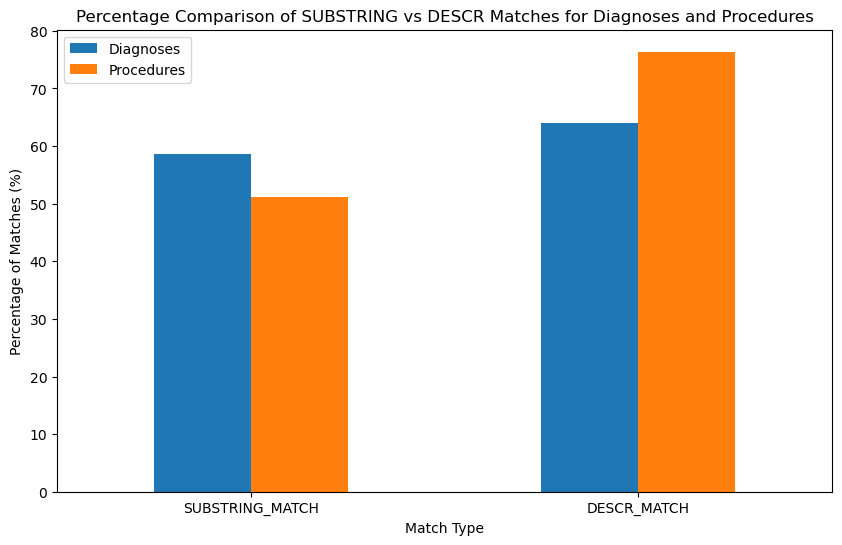

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_descriptions_diagnose and df_descriptions_procedure are already defined
def is_match(docs, code):
    target_code = code.lower()
    docs = docs.lower()
    return target_code in docs

# Apply the matching functions to both dataframes
df_descriptions_diagnose["SUBSTRING_MATCH"] = df_descriptions_diagnose.apply(lambda x: is_match(x["SUBSTRING_DOCS"], x["CODE"]), axis=1)
df_descriptions_diagnose["DESCR_MATCH"] = df_descriptions_diagnose.apply(lambda x: is_match(x["GPT4_DESCR_FLAT_DOCS"], x["CODE"]), axis=1)

df_descriptions_procedure["SUBSTRING_MATCH"] = df_descriptions_procedure.apply(lambda x: is_match(x["SUBSTRING_DOCS"], x["CODE"]), axis=1)
df_descriptions_procedure["DESCR_MATCH"] = df_descriptions_procedure.apply(lambda x: is_match(x["GPT4_DESCR_FLAT_DOCS"], x["CODE"]), axis=1)

# Get the counts of matches for diagnoses and procedures
diagnose_substring_counts = df_descriptions_diagnose["SUBSTRING_MATCH"].value_counts()
diagnose_descr_counts = df_descriptions_diagnose["DESCR_MATCH"].value_counts()

procedure_substring_counts = df_descriptions_procedure["SUBSTRING_MATCH"].value_counts()
procedure_descr_counts = df_descriptions_procedure["DESCR_MATCH"].value_counts()

# Calculate the total number of rows for diagnoses and procedures
total_diagnoses = len(df_descriptions_diagnose)
total_procedures = len(df_descriptions_procedure)

# Calculate the percentage of matches for each category
diagnose_substring_percent = (diagnose_substring_counts.get(True, 0) / total_diagnoses) * 100
diagnose_descr_percent = (diagnose_descr_counts.get(True, 0) / total_diagnoses) * 100

procedure_substring_percent = (procedure_substring_counts.get(True, 0) / total_procedures) * 100
procedure_descr_percent = (procedure_descr_counts.get(True, 0) / total_procedures) * 100

# Prepare data for plotting as percentages
substring_vs_descr = {
    "Diagnoses": [diagnose_substring_percent, diagnose_descr_percent],
    "Procedures": [procedure_substring_percent, procedure_descr_percent]
}

# Create a DataFrame for comparison
comparison_df = pd.DataFrame(substring_vs_descr, index=["SUBSTRING_MATCH", "DESCR_MATCH"])

# Plot the bar chart
comparison_df.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title("Percentage Comparison of SUBSTRING vs DESCR Matches for Diagnoses and Procedures")
plt.xlabel("Match Type")
plt.ylabel("Percentage of Matches (%)")
plt.xticks(rotation=0)

# Show the plot
plt.show()


Now a strict match

{'code': 'S23.41', 'descr': 'Esguince de costillas'}
{'code': 'S23.41X', 'descr': 'Esguince de costillas'}
{'code': 'R07.82', 'descr': 'Dolor intercostal'}
{'code': 'Q76.5', 'descr': 'Costilla cervical'}
{'code': 'S22.3', 'descr': 'Fractura de una costilla'}
{'code': 'S23.4', 'descr': 'Esguince de costillas y esternón'}
{'code': 'S22.4', 'descr': 'Fracturas múltiples de costillas'}
{'code': 'S22', 'descr': 'Fractura de costilla(s), esternón y columna dorsal'}
{'code': 'Q77.2', 'descr': 'Síndrome de la costilla corta'}
{'code': 'M95.4', 'descr': 'Deformidad adquirida de costillas y tórax'}
{'code': 'S23.41XS', 'descr': 'Esguince de costillas, secuela'}
{'code': 'S22.31', 'descr': 'Fractura de una costilla de lado derecho'}
{'code': 'S22.31X', 'descr': 'Fractura de una costilla de lado derecho'}
{'code': 'Q76.6', 'descr': 'Otras malformaciones congénitas de las costillas'}
{'code': 'G58.0', 'descr': 'Neuropatía intercostal'}
{'code': 'J63.5', 'descr': 'Estañosis'}
{'code': 'S22.43', 'des

/tmp/ipykernel_32300/2269375796.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_descriptions_diagnose["SUBSTRING_MATCH"] = df_descriptions_diagnose.apply(lambda x: is_match(x["SUBSTRING_DOCS"], x["CODE"]), axis=1)
/tmp/ipykernel_32300/2269375796.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_descriptions_diagnose["DESCR_MATCH"] = df_descriptions_diagnose.apply(lambda x: is_match(x["GPT4_DESCR_FLAT_DOCS"], x["CODE"]), axis=1)
/tmp/ipykernel_32300/2269375796.py:19: SettingWithCopyWarning: 
A 

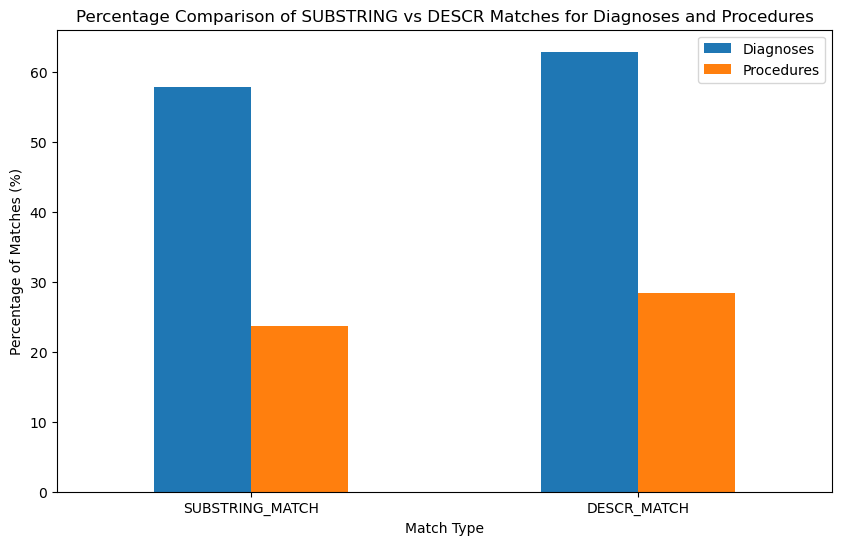

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import json

# Assuming df_descriptions_diagnose and df_descriptions_procedure are already defined
def is_match(docs, code):
    docs = json.loads(docs)
    target_code = code.lower()
    for doc in docs:
        print(doc)
        if target_code == doc["code"].lower():
            return True
    return False

# Apply the matching functions to both dataframes
df_descriptions_diagnose["SUBSTRING_MATCH"] = df_descriptions_diagnose.apply(lambda x: is_match(x["SUBSTRING_DOCS"], x["CODE"]), axis=1)
df_descriptions_diagnose["DESCR_MATCH"] = df_descriptions_diagnose.apply(lambda x: is_match(x["GPT4_DESCR_FLAT_DOCS"], x["CODE"]), axis=1)

df_descriptions_procedure["SUBSTRING_MATCH"] = df_descriptions_procedure.apply(lambda x: is_match(x["SUBSTRING_DOCS"], x["CODE"]), axis=1)
df_descriptions_procedure["DESCR_MATCH"] = df_descriptions_procedure.apply(lambda x: is_match(x["GPT4_DESCR_FLAT_DOCS"], x["CODE"]), axis=1)

# Get the counts of matches for diagnoses and procedures
diagnose_substring_counts = df_descriptions_diagnose["SUBSTRING_MATCH"].value_counts()
diagnose_descr_counts = df_descriptions_diagnose["DESCR_MATCH"].value_counts()

procedure_substring_counts = df_descriptions_procedure["SUBSTRING_MATCH"].value_counts()
procedure_descr_counts = df_descriptions_procedure["DESCR_MATCH"].value_counts()

# Calculate the total number of rows for diagnoses and procedures
total_diagnoses = len(df_descriptions_diagnose)
total_procedures = len(df_descriptions_procedure)

# Calculate the percentage of matches for each category
diagnose_substring_percent = (diagnose_substring_counts.get(True, 0) / total_diagnoses) * 100
diagnose_descr_percent = (diagnose_descr_counts.get(True, 0) / total_diagnoses) * 100

procedure_substring_percent = (procedure_substring_counts.get(True, 0) / total_procedures) * 100
procedure_descr_percent = (procedure_descr_counts.get(True, 0) / total_procedures) * 100

# Prepare data for plotting as percentages
substring_vs_descr = {
    "Diagnoses": [diagnose_substring_percent, diagnose_descr_percent],
    "Procedures": [procedure_substring_percent, procedure_descr_percent]
}

# Create a DataFrame for comparison
comparison_df = pd.DataFrame(substring_vs_descr, index=["SUBSTRING_MATCH", "DESCR_MATCH"])

# Plot the bar chart
comparison_df.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title("Percentage Comparison of SUBSTRING vs DESCR Matches for Diagnoses and Procedures")
plt.xlabel("Match Type")
plt.ylabel("Percentage of Matches (%)")
plt.xticks(rotation=0)

# Show the plot
plt.show()


In [32]:
df_descriptions_procedure["SUBSTRING_MATCH"] = df_descriptions_procedure.apply(lambda x: is_match(x["SUBSTRING_DOCS"], x["CODE"]), axis=1)
df_descriptions_procedure["DESCR_MATCH"] = df_descriptions_procedure.apply(lambda x: is_match(x["GPT4_DESCR_FLAT_DOCS"], x["CODE"]), axis=1)

print(df_descriptions_procedure["SUBSTRING_MATCH"].describe())
print(df_descriptions_procedure["DESCR_MATCH"].describe())

count      127
unique       2
top       True
freq        65
Name: SUBSTRING_MATCH, dtype: object
count      127
unique       2
top       True
freq        97
Name: DESCR_MATCH, dtype: object


/tmp/ipykernel_32300/2283017945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_descriptions_procedure["SUBSTRING_MATCH"] = df_descriptions_procedure.apply(lambda x: is_match(x["SUBSTRING_DOCS"], x["CODE"]), axis=1)
/tmp/ipykernel_32300/2283017945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_descriptions_procedure["DESCR_MATCH"] = df_descriptions_procedure.apply(lambda x: is_match(x["GPT4_DESCR_FLAT_DOCS"], x["CODE"]), axis=1)


The effect on procedures is considarable    

In [67]:
import pandas as pd

def create_filtered_df_rag(df1, df2):
    # Parse 'pos_pred' into 'start' and 'end' integer columns for both DataFrames
    df1[['start', 'end']] = df1['pos_pred'].str.extract(r'(\d+)\s+(\d+)').astype(int)
    df2[['start', 'end']] = df2['pos_pred'].str.extract(r'(\d+)\s+(\d+)').astype(int)
    
    # Group df1 by 'clinical_case' and 'label_pred' to reduce search space
    df1_groups = df1.groupby(['clinical_case', 'label_pred'])
    
    filtered_rows = []
    
    # Iterate over each row in df2
    for index, row in df2.iterrows():
        key = (row['clinical_case'], row['label_pred'])
        match_found = False
        
        # Check if the group exists in df1
        if key in df1_groups.groups:
            df1_subset = df1_groups.get_group(key)
            
            # Vectorized overlap check
            overlap = (df1_subset['start'].clip(lower=row['start']) < df1_subset['end'].clip(upper=row['end']))
            if overlap.any():
                # If a match is found, add the correct code to the filtered row
                matched_row = df1_subset[overlap].iloc[0]
                target_code = matched_row['code']
                hits = json.loads(row['hits'])
                if any(item['code'].lower() == target_code.lower() for item in hits):
                    row['code'] = matched_row['code']
                filtered_rows.append(row)
                match_found = True
        
        # If no match is found, append the original row from df2
        if not match_found:
            filtered_rows.append(row)
    
    # Create a new DataFrame from filtered_rows
    df_filter = pd.DataFrame(filtered_rows)
    
    return df_filter

In [ ]:
def is_match(pred_list, code):
    code = code.lower()
    for pred in pred_list:
        if pred["code"].lower() == code:
            return True
    return False

df_descriptions[""]

/tmp/ipykernel_32300/1932599720.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_descriptions_diagnose["SUBSTRING_MATCH"] = df_descriptions_diagnose.apply(
/tmp/ipykernel_32300/1932599720.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_descriptions_diagnose["DESCR_MATCH"] = df_descriptions_diagnose.apply(
/tmp/ipykernel_32300/1932599720.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

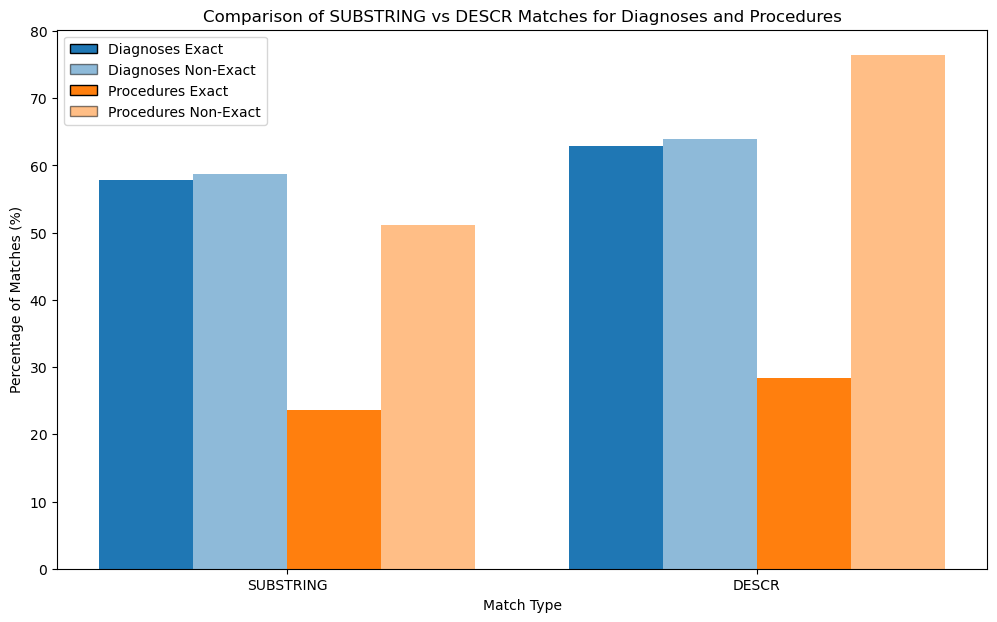

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
from matplotlib.patches import Patch

# Assuming df_descriptions_diagnose and df_descriptions_procedure are already defined

# Original is_match function
def is_match(docs, code):
    target_code = code.lower()
    docs = docs.lower()
    return target_code in docs

# New is_match_exact function
def is_match_exact(docs, code):
    docs = json.loads(docs)
    target_code = code.lower()
    for doc in docs:
        if target_code == doc["code"].lower():
            return True
    return False

# Apply the matching functions to both dataframes
df_descriptions_diagnose["SUBSTRING_MATCH"] = df_descriptions_diagnose.apply(
    lambda x: is_match(x["SUBSTRING_DOCS"], x["CODE"]), axis=1)
df_descriptions_diagnose["DESCR_MATCH"] = df_descriptions_diagnose.apply(
    lambda x: is_match(x["GPT4_DESCR_FLAT_DOCS"], x["CODE"]), axis=1)

df_descriptions_procedure["SUBSTRING_MATCH"] = df_descriptions_procedure.apply(
    lambda x: is_match(x["SUBSTRING_DOCS"], x["CODE"]), axis=1)
df_descriptions_procedure["DESCR_MATCH"] = df_descriptions_procedure.apply(
    lambda x: is_match(x["GPT4_DESCR_FLAT_DOCS"], x["CODE"]), axis=1)

df_descriptions_diagnose["SUBSTRING_MATCH_EXACT"] = df_descriptions_diagnose.apply(
    lambda x: is_match_exact(x["SUBSTRING_DOCS"], x["CODE"]), axis=1)
df_descriptions_diagnose["DESCR_MATCH_EXACT"] = df_descriptions_diagnose.apply(
    lambda x: is_match_exact(x["GPT4_DESCR_FLAT_DOCS"], x["CODE"]), axis=1)

df_descriptions_procedure["SUBSTRING_MATCH_EXACT"] = df_descriptions_procedure.apply(
    lambda x: is_match_exact(x["SUBSTRING_DOCS"], x["CODE"]), axis=1)
df_descriptions_procedure["DESCR_MATCH_EXACT"] = df_descriptions_procedure.apply(
    lambda x: is_match_exact(x["GPT4_DESCR_FLAT_DOCS"], x["CODE"]), axis=1)

# Calculate the total number of rows for diagnoses and procedures
total_diagnoses = len(df_descriptions_diagnose)
total_procedures = len(df_descriptions_procedure)

# Calculate the percentage of matches for each function and category
# Non-Exact Matches
diagnose_substring_percent = (df_descriptions_diagnose["SUBSTRING_MATCH"].sum() / total_diagnoses) * 100
diagnose_descr_percent = (df_descriptions_diagnose["DESCR_MATCH"].sum() / total_diagnoses) * 100
procedure_substring_percent = (df_descriptions_procedure["SUBSTRING_MATCH"].sum() / total_procedures) * 100
procedure_descr_percent = (df_descriptions_procedure["DESCR_MATCH"].sum() / total_procedures) * 100

# Exact Matches
diagnose_substring_exact_percent = (df_descriptions_diagnose["SUBSTRING_MATCH_EXACT"].sum() / total_diagnoses) * 100
diagnose_descr_exact_percent = (df_descriptions_diagnose["DESCR_MATCH_EXACT"].sum() / total_diagnoses) * 100
procedure_substring_exact_percent = (df_descriptions_procedure["SUBSTRING_MATCH_EXACT"].sum() / total_procedures) * 100
procedure_descr_exact_percent = (df_descriptions_procedure["DESCR_MATCH_EXACT"].sum() / total_procedures) * 100

# Prepare data for plotting as percentages
# Create a MultiIndex DataFrame with the desired order
index = ['SUBSTRING', 'DESCR']
columns = pd.MultiIndex.from_tuples(
    [
        ('Diagnoses', 'Exact'),
        ('Diagnoses', 'Non-Exact'),
        ('Procedures', 'Exact'),
        ('Procedures', 'Non-Exact')
    ],
    names=['Group', 'Exactness']
)

data = [
    [
        diagnose_substring_exact_percent,
        diagnose_substring_percent,
        procedure_substring_exact_percent,
        procedure_substring_percent
    ],
    [
        diagnose_descr_exact_percent,
        diagnose_descr_percent,
        procedure_descr_exact_percent,
        procedure_descr_percent
    ]
]

df_plot = pd.DataFrame(data, index=index, columns=columns)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 7))

# Number of groups
n_groups = len(df_plot.index)

# Number of bars per group
n_bars = len(df_plot.columns)

# Set bar width
bar_width = 0.2

# Positions of group bars on X-axis
positions = np.arange(n_groups)

# Adjust positions for each bar within a group
offsets = np.array([-1.5, -0.5, 0.5, 1.5]) * bar_width  # Positions adjusted to match the new bar order

# Colors for diagnoses and procedures
diagnoses_color = '#1f77b4'  # Blue
procedures_color = '#ff7f0e'  # Orange

# Plot bars
for idx, ((group, exactness), values) in enumerate(df_plot.iteritems()):
    # Calculate position for each bar
    pos = positions + offsets[idx]
    # Set color
    color = diagnoses_color if group == 'Diagnoses' else procedures_color
    # Set opacity
    alpha = 1 if exactness == 'Exact' else 0.5
    # Plot the bar
    ax.bar(pos, values, bar_width, label=f"{group} {exactness}", color=color, alpha=alpha)

# Set X-axis labels
ax.set_xticks(positions)
ax.set_xticklabels(df_plot.index)

# Add labels and title
plt.title("Comparison of SUBSTRING vs DESCR Matches for Diagnoses and Procedures")
plt.xlabel("Match Type")
plt.ylabel("Percentage of Matches (%)")

# Create custom legend to avoid duplicates
handles = []
labels = []
for group in ['Diagnoses', 'Procedures']:
    for exactness in ['Exact', 'Non-Exact']:
        color = diagnoses_color if group == 'Diagnoses' else procedures_color
        alpha = 1 if exactness == 'Exact' else 0.5
        label = f"{group} {exactness}"
        if label not in labels:
            handles.append(Patch(facecolor=color, edgecolor='k', alpha=alpha, label=label))
            labels.append(label)

ax.legend(handles=handles)

# Show the plot
plt.show()


/tmp/ipykernel_32300/1622828907.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_descriptions_diagnose["SUBSTRING_MATCH"] = df_descriptions_diagnose.apply(
/tmp/ipykernel_32300/1622828907.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_descriptions_diagnose["DESCR_MATCH"] = df_descriptions_diagnose.apply(
/tmp/ipykernel_32300/1622828907.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

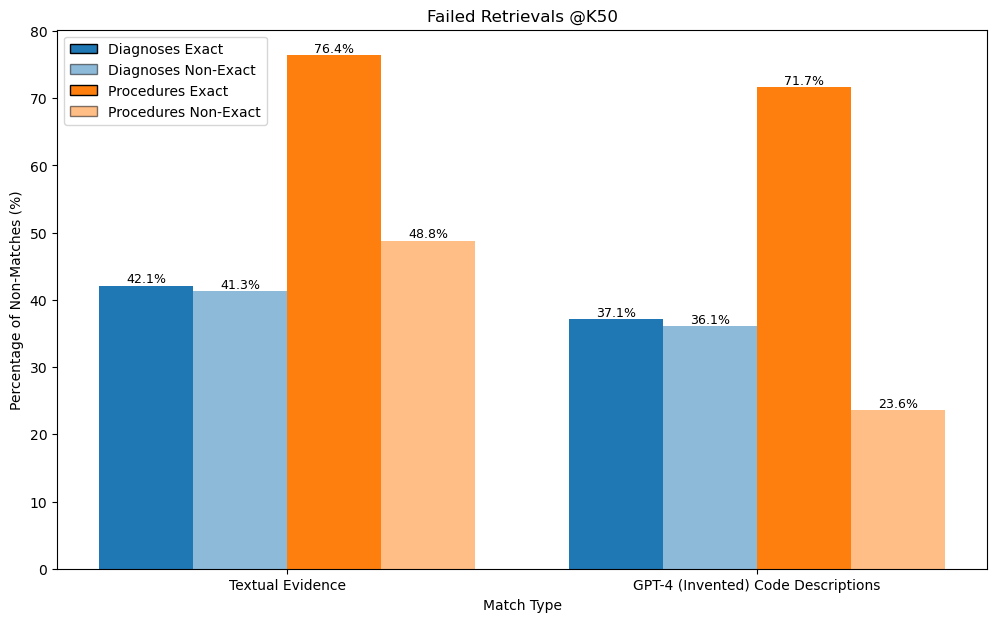

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
from matplotlib.patches import Patch

# Assuming df_descriptions_diagnose and df_descriptions_procedure are already defined

# Original is_match function
def is_match(docs, code):
    target_code = code.lower()
    docs = docs.lower()
    return target_code in docs

# New is_match_exact function
def is_match_exact(docs, code):
    docs = json.loads(docs)
    target_code = code.lower()
    for doc in docs:
        if target_code == doc["code"].lower():
            return True
    return False

# Apply the matching functions to both dataframes
df_descriptions_diagnose["SUBSTRING_MATCH"] = df_descriptions_diagnose.apply(
    lambda x: is_match(x["SUBSTRING_DOCS"], x["CODE"]), axis=1)
df_descriptions_diagnose["DESCR_MATCH"] = df_descriptions_diagnose.apply(
    lambda x: is_match(x["GPT4_DESCR_FLAT_DOCS"], x["CODE"]), axis=1)

df_descriptions_procedure["SUBSTRING_MATCH"] = df_descriptions_procedure.apply(
    lambda x: is_match(x["SUBSTRING_DOCS"], x["CODE"]), axis=1)
df_descriptions_procedure["DESCR_MATCH"] = df_descriptions_procedure.apply(
    lambda x: is_match(x["GPT4_DESCR_FLAT_DOCS"], x["CODE"]), axis=1)

df_descriptions_diagnose["SUBSTRING_MATCH_EXACT"] = df_descriptions_diagnose.apply(
    lambda x: is_match_exact(x["SUBSTRING_DOCS"], x["CODE"]), axis=1)
df_descriptions_diagnose["DESCR_MATCH_EXACT"] = df_descriptions_diagnose.apply(
    lambda x: is_match_exact(x["GPT4_DESCR_FLAT_DOCS"], x["CODE"]), axis=1)

df_descriptions_procedure["SUBSTRING_MATCH_EXACT"] = df_descriptions_procedure.apply(
    lambda x: is_match_exact(x["SUBSTRING_DOCS"], x["CODE"]), axis=1)
df_descriptions_procedure["DESCR_MATCH_EXACT"] = df_descriptions_procedure.apply(
    lambda x: is_match_exact(x["GPT4_DESCR_FLAT_DOCS"], x["CODE"]), axis=1)

# Calculate the total number of rows for diagnoses and procedures
total_diagnoses = len(df_descriptions_diagnose)
total_procedures = len(df_descriptions_procedure)

# Calculate the percentage of non-matches for each function and category
# Non-Exact Matches (Inverse)
diagnose_substring_non_match_percent = 100 - ((df_descriptions_diagnose["SUBSTRING_MATCH"].sum() / total_diagnoses) * 100)
diagnose_descr_non_match_percent = 100 - ((df_descriptions_diagnose["DESCR_MATCH"].sum() / total_diagnoses) * 100)
procedure_substring_non_match_percent = 100 - ((df_descriptions_procedure["SUBSTRING_MATCH"].sum() / total_procedures) * 100)
procedure_descr_non_match_percent = 100 - ((df_descriptions_procedure["DESCR_MATCH"].sum() / total_procedures) * 100)

# Exact Matches (Inverse)
diagnose_substring_exact_non_match_percent = 100 - ((df_descriptions_diagnose["SUBSTRING_MATCH_EXACT"].sum() / total_diagnoses) * 100)
diagnose_descr_exact_non_match_percent = 100 - ((df_descriptions_diagnose["DESCR_MATCH_EXACT"].sum() / total_diagnoses) * 100)
procedure_substring_exact_non_match_percent = 100 - ((df_descriptions_procedure["SUBSTRING_MATCH_EXACT"].sum() / total_procedures) * 100)
procedure_descr_exact_non_match_percent = 100 - ((df_descriptions_procedure["DESCR_MATCH_EXACT"].sum() / total_procedures) * 100)

# Prepare data for plotting as percentages
# Create a MultiIndex DataFrame with the desired order
index = ['Textual Evidence', 'GPT-4 (Invented) Code Descriptions']
columns = pd.MultiIndex.from_tuples(
    [
        ('Diagnoses', 'Exact'),
        ('Diagnoses', 'Non-Exact'),
        ('Procedures', 'Exact'),
        ('Procedures', 'Non-Exact')
    ],
    names=['Group', 'Exactness']
)

data = [
    [
        diagnose_substring_exact_non_match_percent,
        diagnose_substring_non_match_percent,
        procedure_substring_exact_non_match_percent,
        procedure_substring_non_match_percent
    ],
    [
        diagnose_descr_exact_non_match_percent,
        diagnose_descr_non_match_percent,
        procedure_descr_exact_non_match_percent,
        procedure_descr_non_match_percent
    ]
]

df_plot = pd.DataFrame(data, index=index, columns=columns)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 7))

# Number of groups
n_groups = len(df_plot.index)

# Number of bars per group
n_bars = len(df_plot.columns)

# Set bar width
bar_width = 0.2

# Positions of group bars on X-axis
positions = np.arange(n_groups)

# Adjust positions for each bar within a group
offsets = np.array([-1.5, -0.5, 0.5, 1.5]) * bar_width  # Positions adjusted to match the bar order

# Colors for diagnoses and procedures
diagnoses_color = '#1f77b4'  # Blue
procedures_color = '#ff7f0e'  # Orange

# Plot bars
for idx, ((group, exactness), values) in enumerate(df_plot.iteritems()):
    # Calculate position for each bar
    pos = positions + offsets[idx]
    # Set color
    color = diagnoses_color if group == 'Diagnoses' else procedures_color
    # Set opacity
    alpha = 1 if exactness == 'Exact' else 0.5
    # Plot the bar
    ax.bar(pos, values, bar_width, label=f"{group} {exactness}", color=color, alpha=alpha)

# Set X-axis labels
ax.set_xticks(positions)
ax.set_xticklabels(df_plot.index)

# Add labels and title
plt.title("Failed Retrievals @K50")
plt.xlabel("Match Type")
plt.ylabel("Percentage of Non-Matches (%)")

# Create custom legend to avoid duplicates
handles = []
labels = []
for group in ['Diagnoses', 'Procedures']:
    for exactness in ['Exact', 'Non-Exact']:
        color = diagnoses_color if group == 'Diagnoses' else procedures_color
        alpha = 1 if exactness == 'Exact' else 0.5
        label = f"{group} {exactness}"
        if label not in labels:
            handles.append(Patch(facecolor=color, edgecolor='k', alpha=alpha, label=label))
            labels.append(label)

ax.legend(handles=handles)


# Add percentages above the bars
for idx, ((group, exactness), values) in enumerate(df_plot.iteritems()):
    pos = positions + offsets[idx]
    for x, y in zip(pos, values):
        ax.text(
            x, y,
            f'{y:.1f}%',
            ha='center',
            va='bottom',
            fontsize=9
        )

# Show the plot
plt.show()


# Show the plot
plt.show()


In [72]:
# Calculate lengths of codes
df_descriptions_procedure['CODE_LENGTH'] = df_descriptions_procedure['CODE'].astype(str).apply(len)

# Count occurrences of each length
length_counts = df_descriptions_procedure['CODE_LENGTH'].value_counts().sort_index()

# Calculate percentages
total_codes = len(df_descriptions_procedure)
length_percentages = (length_counts / total_codes) * 100

# Print the percentages
print(length_percentages)


4    58.267717
7    41.732283
Name: CODE_LENGTH, dtype: float64


/tmp/ipykernel_32300/4235799272.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_descriptions_procedure['CODE_LENGTH'] = df_descriptions_procedure['CODE'].astype(str).apply(len)


In [7]:
df_test = codiformat.get_df_x(split='test')

df_test_procedure = df_test[df_test['TYPE'] == 'PROCEDIMIENTO']

# Calculate lengths of codes
df_test_procedure['CODE_LENGTH'] = df_test_procedure['CODE'].astype(str).apply(len)

# Count occurrences of each length
length_counts = df_test_procedure['CODE_LENGTH'].value_counts().sort_index()

# Calculate percentages
total_codes = len(df_test_procedure)
length_percentages = (length_counts / total_codes) * 100

# Print the percentages
print(length_percentages)

4    54.136691
7    45.863309
Name: CODE_LENGTH, dtype: float64


/tmp/ipykernel_60539/2021629743.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_procedure['CODE_LENGTH'] = df_test_procedure['CODE'].astype(str).apply(len)


### Code retrieval

In [59]:
df_code = pd.DataFrame()
df_code["clinical_case"] = clinical_case_list
df_code["pos_pred"] = pos_list
df_code["label_pred"] = label_pred_list
df_code["code"] = code_list

# Reuse previous methods for filtering overlapping entities
df_code_path = f"{path_resources}/reeval/df_retrieval.tsv"
df_code_path_d = df_code_path.replace(".tsv", "-d.tsv")
df_code_path_p = df_code_path.replace(".tsv", "-p.tsv")

df_code.to_csv(df_code_path, sep="\t", index=False, header=False)

df_code_d = df_code[df_code['label_pred'] == 'DIAGNOSTICO'][['clinical_case','code']]
df_code_d.to_csv(df_code_path_d, sep="\t", index=False, header=False)

df_code_p = df_code[df_code['label_pred'] == 'PROCEDIMIENTO'][['clinical_case','code']]
df_code_p.to_csv(df_code_path_p, sep="\t", index=False, header=False)

eval.eval_x(split='test', path_x=df_code_path)
eval.eval_dp(split='test', path=df_code_path_d, code_field='DIAGNOSTICO')
eval.eval_dp(split='test', path=df_code_path_p, code_field='PROCEDIMIENTO')

Standard Output: 
-----------------------------------------------------
Clinical case name			Precision
-----------------------------------------------------
S0004-06142005000500011-1		0.421
-----------------------------------------------------
S0004-06142005000900014-1		0.5
-----------------------------------------------------
S0004-06142006000100010-1		0.455
-----------------------------------------------------
S0004-06142006000500012-1		0.208
-----------------------------------------------------
S0004-06142006000600014-1		0.286
-----------------------------------------------------
S0004-06142006000700011-1		0.125
-----------------------------------------------------
S0004-06142006000700012-1		0.118
-----------------------------------------------------
S0004-06142007000100011-1		0.417
-----------------------------------------------------
S0004-06142007000200011-1		0.3
-----------------------------------------------------
S0004-06142007000200017-1		0.143
-------------------------------

(CompletedProcess(args='python /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiespD_P_evaluation.py -g /home/jovyan/work/icdllmeval/resources/download/codiesp/final_dataset_v4_to_publish/test/testP.tsv -p /home/jovyan/work/icdllmeval/resources//reeval/df_retrieval-p.tsv -c /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiesp_codes/codiesp-P_codes.tsv', returncode=0, stdout='\nMAP estimate: 0.11\n\n', stderr=''),
 CompletedProcess(args='python /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/comp_f1_diag_proc.py -g /home/jovyan/work/icdllmeval/resources/download/codiesp/final_dataset_v4_to_publish/test/testP.tsv -p /home/jovyan/work/icdllmeval/resources//reeval/df_retrieval-p.tsv -c /home/jovyan/work/icdllmeval/resources/download/codiesp-evaluation-script/codiesp_codes/codiesp-P_codes.tsv', returncode=0, stdout='\n-----------------------------------------------------\nClinical case name\t\t\tPrecision\n-

Eval RAG performance

/home/jovyan/work/icdllmeval/resources/gpt-descriptions/codiesp_test_descriptions_hits.xlsx